<h1>Image Reflection and Partitioning</h1>

Functions for horizontal reflection of images and segmenting the image similar to the method described in MM-DFR: http://arxiv.org/pdf/1509.00244v1.pdf

In [74]:
%matplotlib inline

import os
import dlib
import fnmatch
import matplotlib.pyplot as plt
import numpy as np
import sys

from IPython.display import Image as Display
from matplotlib.pyplot import imshow 
from scipy.spatial import distance
from skimage import io
from skimage.color import rgb2grey
from skimage.transform import resize
from PIL import Image

In [37]:
data_path = '../../data/lfw_cropped'
width, height = 230, 230

In [11]:
def get_face_to_file_path_dict():
    face_to_file_paths_dict = {}
    
    for root, dirnames, filenames in os.walk(data_path):
        for dirname in dirnames:
            if dirname not in face_to_file_paths_dict:
                face_to_file_paths_dict[dirname] = []
            directory_path = os.path.join(data_path, dirname)
            for filename in os.listdir(directory_path):
                if filename.endswith(".jpg"):
                    face_to_file_paths_dict[dirname].append(os.path.join(directory_path, filename))
                            
    return face_to_file_paths_dict

In [55]:
def reflection(image):
    return np.array([list(reversed(row)) for row in image])

In [59]:
def partition(image, top_left, rows, cols):
    return np.array([row[top_left[1]:top_left[1] + cols] for row in image[top_left[0]:top_left[0] + rows]])

In [12]:
face_to_file_paths = get_face_to_file_path_dict()

In [113]:
image = io.imread(face_to_file_paths.items()[5][1][0])

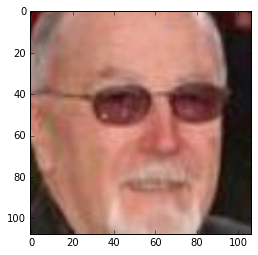

In [101]:
imshow(image)

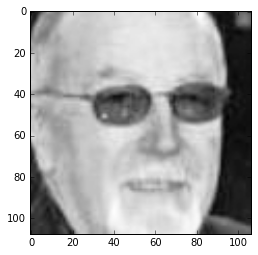

In [102]:
grey_image = rgb2grey(image)
imshow(grey_image, cmap='Greys_r')

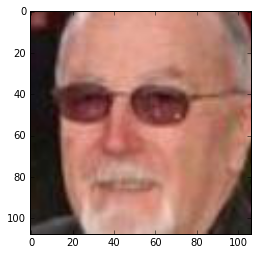

In [103]:
reflected_image = reflection(image)
imshow(reflected_image, cmap='Greys_r')

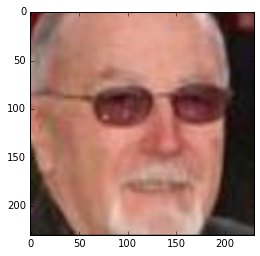

In [104]:
resized_image = resize(image, (width, height))
imshow(resized_image)

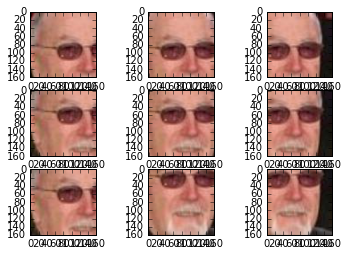

In [111]:
rows, cols = 160, 160
fig, ax = plt.subplots(nrows=3, ncols=3)
ax[0][0].imshow(partition(resized_image, (0, 0), rows, cols))
ax[0][1].imshow(partition(resized_image, (0, 35), rows, cols))
ax[0][2].imshow(partition(resized_image, (0, 70), rows, cols))
ax[1][0].imshow(partition(resized_image, (35, 0), rows, cols))
ax[1][1].imshow(partition(resized_image, (35, 35), rows, cols))
ax[1][2].imshow(partition(resized_image, (35, 70), rows, cols))
ax[2][0].imshow(partition(resized_image, (35, 0), rows, cols))
ax[2][1].imshow(partition(resized_image, (70, 35), rows, cols))
ax[2][2].imshow(partition(resized_image, (70, 70), rows, cols))

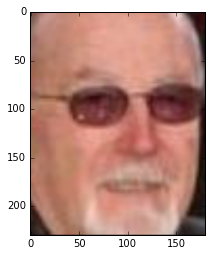

In [110]:
imshow(partition(resized_image, (0, 25), 230, 180))